# FStrings EXPERT

Esta tabla contiene la información adicional de las sentencias de tipo JoinedStr (Strings formateados) EXPERT.  --> ABEL COMPLETAR <--

## 1 - Obtencion de datos

In [1]:
import matplotlib.pyplot as plt
from notebooks_utils import *

TARGET_FEATURE = 'fstring__expertise_level'
TARGET_CLASS = 'EXPERT'
full_table = get_data('fstrings')

instances_for_class_low = len(full_table[full_table[TARGET_FEATURE] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TARGET_FEATURE] == "EXPERT"])

print(f"The dataset contains {instances_for_class_low} ({instances_for_class_low/len(full_table)*100:.4}%) instances for BEGINNER class and {instances_for_class_high} ({instances_for_class_high/len(full_table)*100:.4}%) for EXPERT class.")

2024-05-27 12:48:15.940959 Data cache files found ...
2024-05-27 12:48:15.940959 Data cache files successfully loaded!!
The dataset contains 4961 (23.59%) instances for BEGINNER class and 16073 (76.41%) for EXPERT class.


In [2]:
full_table = full_table[full_table[TARGET_FEATURE] == TARGET_CLASS]

# Table name, features and target.
TABLE_NAME = 'fstrings'
TABLE_FEATURES = ['fstring__number_of_elements', 'fstring__constants_pct', 'fstring__expressions_pct']

# Load features and target.
X = full_table[TABLE_FEATURES]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. Each of the instances corresponds to a program. For each program we have {X.shape[1]} attributes.')

Features shape: (16073, 3)
As we can see the downloaded data contains a total of 16073 instances. Each of the instances corresponds to a program. For each program we have 3 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [3]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 16073 entries, 4961 to 21033
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   fstring__number_of_elements  16073 non-null  int64  
 1   fstring__constants_pct       16073 non-null  float64
 2   fstring__expressions_pct     16073 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 502.3 KB
None


Cómo podemos ver la tabla está compuesta por 3 variables numéricas y 1 de tipo objeto.

### 2.1 - Duplicados
Miramos si la tabla tiene entradas duplicadas.

In [4]:
number_of_duplicated_entries = sum(full_table.duplicated(subset=TABLE_FEATURES))
duplicated_entries_pct = number_of_duplicated_entries / len(full_table) * 100
print(f"The dataset contains [{duplicated_entries_pct:.4}%] of duplicated entries.")

The dataset contains [99.66%] of duplicated entries.


### 2.3 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [5]:
X.isnull().sum()

fstring__number_of_elements    0
fstring__constants_pct         0
fstring__expressions_pct       0
dtype: int64

In [6]:
print_empty_cols(X)

fstring__number_of_elements
---------------------------
0 instancias no tienen un valor para la columna fstring__number_of_elements


fstring__constants_pct
----------------------
0 instancias no tienen un valor para la columna fstring__constants_pct


fstring__expressions_pct
------------------------
0 instancias no tienen un valor para la columna fstring__expressions_pct




### 2.4 - Describimos los valores de las variables de la tabla.

In [7]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
fstring__number_of_elements,16073.0,3.180676,1.983527,0.0,2.000000,3.0,4.000000,44.0
fstring__constants_pct,16073.0,0.555410,0.157947,0.0,0.500000,0.5,0.666667,1.0
fstring__expressions_pct,16073.0,0.444528,0.157925,0.0,0.333333,0.5,0.500000,1.0


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesaario ver la distribucion de lo valores para hacer los bins (categorias).

In [8]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "fstring__number_of_elements": [(0.0, 2.0), (2.0, 3.0), (3.0, 4.0), (4.0, inf)],  # min: 0.0 max:44.0
    "fstring__constants_pct": [(0.0, 0.5), (0.5, 0.5), (0.5, 0.67), (0.67, inf)],  # min: 0.0 max: 1.0
    "fstring__expressions_pct": [(0.0, 0.33), (0.33, 0.5), (0.5, 0.5), (0.5, inf)],  # min: 0.0 max: 1.0
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['fstring__number_of_elements'], 10))
print(get_statistics(X_copy, ['fstring__constants_pct'], 10))
print(get_statistics(X_copy, ['fstring__expressions_pct'], 10))


# 2 FEATURES
print("--- TWO FEATURES ---")
#print(get_statistics(X_copy, ['module__function_defs_pct', 'module__number_of_classes'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
#print(get_statistics(X_copy, ['module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct'], 10))

--- SINGLE FEATURE ---
fstring__number_of_elements  count  percentage
                  [2.0_3.0)   5833   36.290674
                  [3.0_4.0)   4652   28.942948
                  [4.0_inf]   4489   27.928825
                  [0.0_2.0)   1099    6.837554

fstring__constants_pct  count  percentage
             [0.5_0.5]   8124   50.544391
            [0.5_0.67)   5769   35.892491
             [0.0_0.5)   1354    8.424065
            [0.67_inf]    826    5.139053

fstring__expressions_pct  count  percentage
               [0.5_0.5]   8124   50.544391
              [0.33_0.5)   5769   35.892491
               [0.5_inf]   1353    8.417844
              [0.0_0.33)    827    5.145275

--- TWO FEATURES ---
--- THREE FEATURES ---


In [9]:
def normalize_datatypes(X:pd.DataFrame) -> (pd.DataFrame, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')        
    columns_names = X.columns.tolist()
    return X, columns_names

X, TABLE_FEATURES = normalize_datatypes(X)
# Print information about the loaded table
print(f'Features shape: {X.shape}')

Features shape: (16073, 3)


#### Muestra la matriz de correlación de pearson entre las variables de la tabla.

<Axes: >

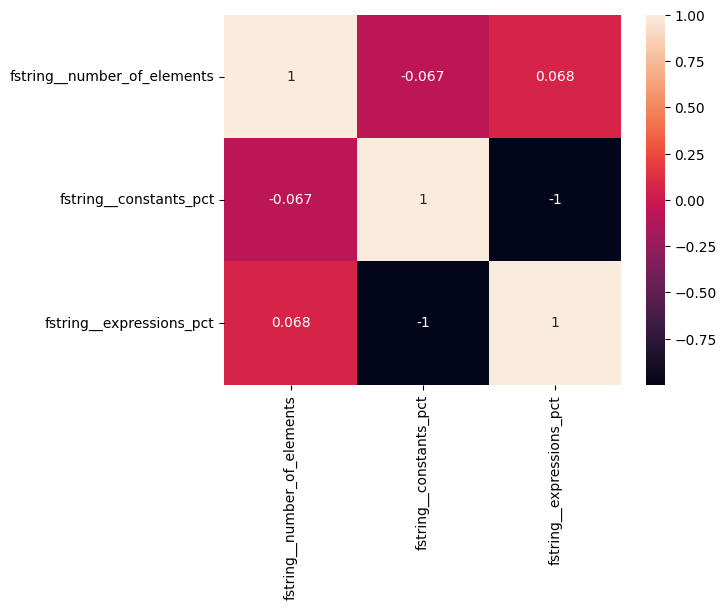

In [10]:
sns.heatmap(X.corr(), annot=True)

## 3 - Detección de valores atípicos (outliers)
Una vez sabemos qué datos contiene la tabla, analizaremos los valores que toma cada una de las variables de cada instancia. El objetivo es identificar posibles valores atípicos que nos dificulten la realización de futuras tareas. 
Tras su análisis, se puede concluir que un valor:
    - **Es erróneo**. En este caso hay que tomar una decisión para cada caso, siendo los tratamientos más extendidos son listwise, pairwise, drop variables, mean/median imputation, most frequent, separate category, zero imputation, cold deck, hot deck,(stochastic) regression, k-NN and multiple imputation. Los resultados de imputación regresiva, k-NN y múltiple dan buenos resultados, aunque, como se ha indicado, es necesario el estudio en cada caso.
    - **Es correcto, pero anómalo**. Se documenta su existencia para su posible discusión y se mantiene en el dataset. En estos casos se hace necesaria la utilización de algoritmos y estadísticos que no sean muy sensibles a dichos valores anómalos.

## Univariate
Para cada uno de los atributos se debe realizar un análisis y detección de valores atípicos, estudiando su posible causa. 
Existen diversas formas de calcular los valores anómalos. 

### Variables numéricas
Para las variables numéricas, se suele identificar: 
    - a) Valor atípico leve es el que está fuera de $[Q1 - 1.5IQR, Q3 + 1.5IQR]$, donde $IQR = Q3-Q1$.
    - b) Valor atípico extremo está fuera de $[Q1 - 3IQR, Q3 + 3IQR]$.

La idea es probar con a) y si hay pocas instancias analizarlas. Si hubiese muchas, mirar b) y analizar si fuesen pocas. No hay un algoritmo o método estipulado, puesto que depende del dominio del problema y de los datos.

Los límites de Tukey se basan en los cuartiles de los datos y son sensibles a la presencia de sesgo en la distribución. Cuando hay asimetría en los datos, los límites de Tukey pueden no ser tan efectivos para identificar outliers de manera equitativa en ambos extremos de la distribución. El Coeficiente de Medcouple es útil para identificar la asimetría en los datos, especialmente en presencia de valores atípicos o sesgados. Es una medida robusta porque no se ve tan afectada por valores extremos como la media y la desviación estándar. El MC puede proporcionar información adicional sobre la asimetría de la distribución, lo que te permite ajustar los límites de Tukey de manera más apropiada para tu conjunto de datos específico. Una posible variacion de los límites de Tukey teniendo en cuenta MC podria ser: 
   - Si MC es mayor que 0 (asimetría hacia la derecha):
      - low = (q1-1.5 * math.exp(-4*mc) * iqr)
      - high = (q3+1.5 * math.exp(3.5*mc) * iqr)
   - Si la asimetriza es hacia la izquierda:    
      - low = (q1-1.5 * math.exp(-3.5*mc) * iqr)
      - high = (q3+1.5 * math.exp(4*mc) * iqr)


### Variables categóricas
Para las variables categóricas no existe el concepto de valor anómalo, pero sí se puede considerar en base a un análisis de frecuencia. Por ejemplo, que el uso de una categoría sea residual, pudiendo tener un 0.1% de instancias en el dataset. Para detectar estos valores, se puede fijar un valor mínimo de frecuencia en función del número posible de valores de la variable categórica (2 en el caso de una variable booleana). Por ejemplo, un umbral de $\frac{0.2\%}{valores}$ (0.1% en el caso de una variable booleana)

## Analisis detallado de variables
Para cada una de las 3 variable (1 numerica y 2 porcentuales) se hara un analisis detallado 

### Variable number_of_elements (1/3)
Esta variable representa el número de elementos del JoinedStr. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 44. Con una media de 3.188.

<Axes: ylabel='fstring__number_of_elements'>

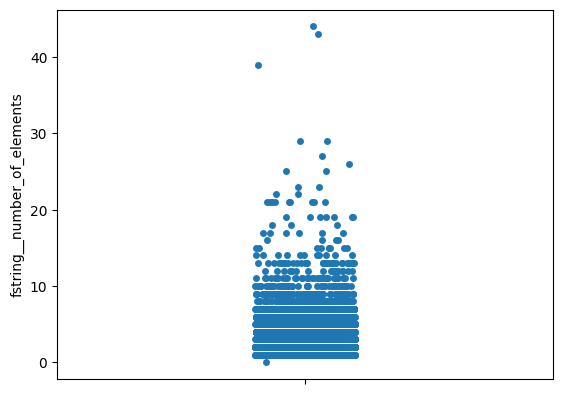

In [11]:
sns.stripplot(X['fstring__number_of_elements'])

In [12]:
print_outliers_for_df_column(X, 'fstring__number_of_elements')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.8394271758469669
Rango valores atípicos extremos (Tukey): [-4.0,10.0]
Rango valores atípicos leves (Tukey): [-1.0,7.0]
Rango valores atípicos extremos (Fixed BoxPlot): [1.8410845257801798,90.16990545469856]
-3.0IQR: 0 instancias tienen un valor para fstring__number_of_elements inferior a -4.0 (Q1-3*IQR) para fstring__number_of_elements. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para fstring__number_of_elements inferior a -1.0 (Q1-1.5*IQR) para fstring__number_of_elements. Representando un 0.0% del total de instancias.
+1.5IQR: 412 instancias tienen un valor para fstring__number_of_elements superior a 7.0 (Q3+1.5*IQR) para fstring__number_of_elements. Representando un 2.563% del total de instancias.
+3.0IQR: 151 instancias tienen un valor para fstring__number_of_elements superior a 10.0 (Q3-3*IQR) para fstring__number_of_elements. Representando un 0.9395% del total de instancias.
L: 10

In [13]:
X[X['fstring__number_of_elements'] > 10].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,fstring__number_of_elements,fstring__constants_pct,fstring__expressions_pct
count,151.000000,151.000000,151.000000
mean,15.086093,0.514338,0.485662
std,5.564099,0.035461,0.035461
min,11.000000,0.333333,0.454545
25%,12.000000,0.500000,0.461538
50%,13.000000,0.526316,0.473684
75%,16.500000,0.538462,0.500000
max,44.000000,0.545455,0.666667


### Variable constants_pct (2/3)
Esta variable representa la proporción de los valores usados para parametrizar el JoinedStr que son constantes. Toma los valores de 0.0 - 1.0. La media es 0.555.

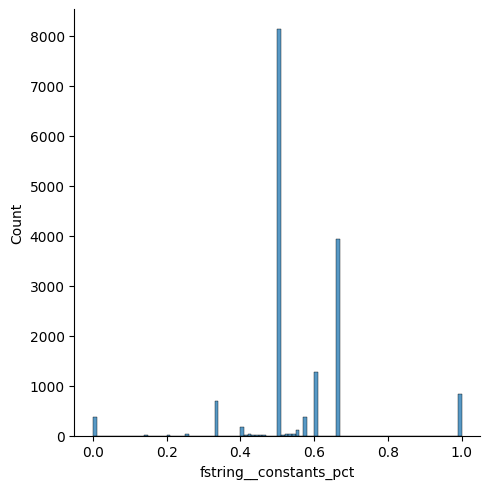

In [14]:
sns.displot(X['fstring__constants_pct'], bins=[i / 100 for i in range(0, 101)])

In [15]:
print_outliers_for_df_column(X, 'fstring__constants_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.3946551749965944
Rango valores atípicos extremos (Tukey): [-5.960464477539063e-08,1.1666667461395264]
Rango valores atípicos leves (Tukey): [0.2499999701976776,0.916666716337204]
Rango valores atípicos extremos (Fixed BoxPlot): [0.43718663152763965,1.878732827699061]
-3.0IQR: 0 instancias tienen un valor para fstring__constants_pct inferior a -5.960464477539063e-08 (Q1-3*IQR) para fstring__constants_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 392 instancias tienen un valor para fstring__constants_pct inferior a 0.2499999701976776 (Q1-1.5*IQR) para fstring__constants_pct. Representando un 2.439% del total de instancias.
+1.5IQR: 826 instancias tienen un valor para fstring__constants_pct superior a 0.916666716337204 (Q3+1.5*IQR) para fstring__constants_pct. Representando un 5.139% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para fstring__constants_pct superior a 1.1666667461395264 (Q3-3*IQR) p

In [16]:
X[X['fstring__constants_pct'] == 1].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,fstring__number_of_elements,fstring__constants_pct,fstring__expressions_pct
count,826.0,826.0,826.0
mean,1.0,1.0,0.0
std,0.0,0.0,0.0
min,1.0,1.0,0.0
25%,1.0,1.0,0.0
50%,1.0,1.0,0.0
75%,1.0,1.0,0.0
max,1.0,1.0,0.0


### Variable expressions_pct (3/3)
Esta variable representa la proporción de valores usados para parametrizar el JoinedStr que son expresiones. Toma los valores de 0.0 - 1.0. La media es 0.444.

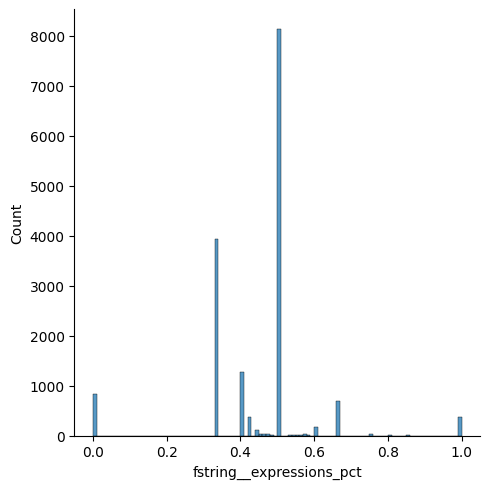

In [17]:
sns.displot(X['fstring__expressions_pct'], bins=[i / 100 for i in range(0, 101)])

In [18]:
print_outliers_for_df_column(X, 'fstring__expressions_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.027736127376556396
Rango valores atípicos extremos (Tukey): [-0.16666662693023682,0.9999999701976776]
Rango valores atípicos leves (Tukey): [0.08333335816860199,0.7499999850988388]
Rango valores atípicos extremos (Fixed BoxPlot): [0.10646169930908408,0.7793332092953529]
-3.0IQR: 0 instancias tienen un valor para fstring__expressions_pct inferior a -0.16666662693023682 (Q1-3*IQR) para fstring__expressions_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 827 instancias tienen un valor para fstring__expressions_pct inferior a 0.08333335816860199 (Q1-1.5*IQR) para fstring__expressions_pct. Representando un 5.145% del total de instancias.
+1.5IQR: 391 instancias tienen un valor para fstring__expressions_pct superior a 0.7499999850988388 (Q3+1.5*IQR) para fstring__expressions_pct. Representando un 2.433% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para fstring__expressions_pct superior a 0.999999970197

In [19]:
X[X['fstring__expressions_pct'] > 0.77].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,fstring__number_of_elements,fstring__constants_pct,fstring__expressions_pct
count,391.00000,391.000000,391.000000
mean,1.56266,0.005903,0.994097
std,1.15049,0.033458,0.033458
min,1.00000,0.000000,0.777778
25%,1.00000,0.000000,1.000000
50%,1.00000,0.000000,1.000000
75%,2.00000,0.000000,1.000000
max,9.00000,0.222222,1.000000
